In [1]:
import LADPackage
import examples
import shmtools
import numpy as np

/Users/eric/repo/shm/shmtools/classification/nlpca.py:27: UserWarning: TensorFlow not available. NLPCA functions will not work. Install TensorFlow: pip install tensorflow
  warnings.warn(


In [2]:
# Import active sensing dataset.
waveform_base, waveform_test, sensor_layout, pair_list, border_struct, sample_rate, actuation_waveform, damage_location = LADPackage.active_sensing.active_sensing_utils.import_active_sense_data(
    filename=None  # File Name (optional)
)

In [3]:
# Process active sensing waveforms with baseline subtraction and matched filtering.
filter_result, layout_subset, pair_subset = LADPackage.active_sensing.active_sensing_utils.process_active_sensing_waveforms(
    sensor_subset=[0,5,10,15,20],  # Sensor Subset List (required)
    sensor_layout=sensor_layout,  # Sensor Layout (required)
    pair_list=pair_list,  # Sensor Pair List (required)
    waveform_base=waveform_base,  # Baseline Waveforms (required)
    waveform_test=waveform_test,  # Test Waveforms (required)
    matched_waveform=actuation_waveform)

In [4]:
# Filter guided wave envelopes to first arrival.
filtered_waveforms = LADPackage.active_sensing.active_sensing_utils.arrival_filter(
    waveforms=filter_result,  # <class 'numpy.ndarray'> (required)
    front_clip=450,  # frontClip (optional)
    arrival_offset=450  # arrivalOffset (optional)
)

In [5]:
# Map processed active sensing waveforms to geometry.
x_matrix, y_matrix, combined_geometry, data_map_2d = LADPackage.active_sensing.active_sensing_utils.map_active_sensing_geometry(
    velocity=66000,  # Velocity (required)
    subset_window=1,  # Subset Window (required)
    distance_allowance=np.inf,  # Distance Allowance (required)
    border_struct=border_struct,  # Geometry (required)
    x_spacing=0.5,  # X Spacing (required)
    y_spacing=0.5,  # Y Spacing (required)
    sample_rate=sample_rate,  # Sample Rate Hz (required)
    actuation_waveform=actuation_waveform,  # Actuation Waveform (required)
    data=filtered_waveforms,  # Data (required)
    pair_list=pair_subset,  # Sensor Pair List (required)
    sensor_layout=layout_subset)

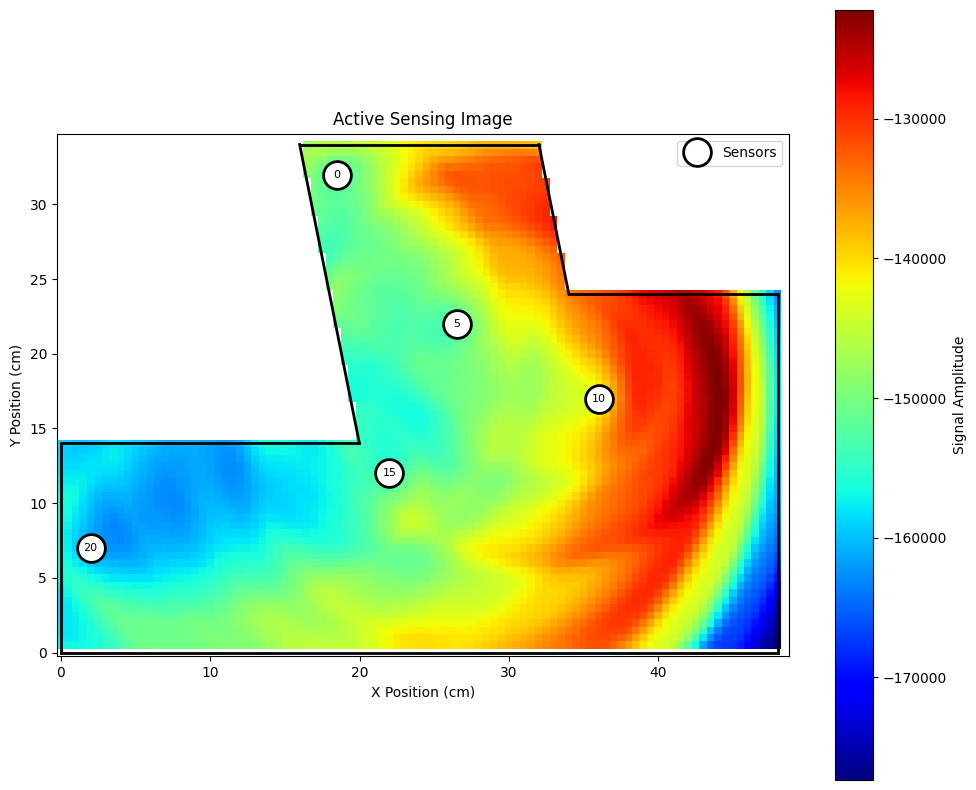

In [6]:
# Plot active sensing map with geometry.
result = LADPackage.active_sensing.active_sensing_utils.plot_as_result(
    x_matrix=x_matrix,  # <class 'numpy.ndarray'> (required)
    y_matrix=y_matrix,  # <class 'numpy.ndarray'> (required)
    data_map_2d=data_map_2d,  # <class 'numpy.ndarray'> (required)
    border=combined_geometry,  # <class 'numpy.ndarray'> (required)
    sensor_layout=layout_subset)